![Sales Forcasting](https://triuminfo.com/application/views/images/sales_forecasting_banner.jpg)

## 📚 Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 


In [1]:
!pip install fastparquet


df = pd.read_csv("datasets/train.csv")

df.to_parquet("train.parquet")


#### We needed to do so because train.csv was so big to be uploaded to github

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('datasets/train.csv', index_col=0)
df.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [ ]:
df.family.nunique()

33

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

Scaling of Numerical Features

In [ ]:
cols = list(df[['sales', 'onpromotion']].columns)
cols

['sales', 'onpromotion']

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

df[cols] = scaler.fit_transform(df[cols])

In [ ]:
trian_date = df[cols]

In [ ]:
train_data = df.groupby(['date']).agg({'sales':'mean', 'onpromotion':'mean'})
train_data.tail()

,sales,onpromotion
date,,
2017-08-11,0.003718,0.010738
2017-08-12,0.003566,0.006295
2017-08-13,0.003895,0.007030
2017-08-14,0.003424,0.006091
2017-08-15,0.003432,0.008031


In [ ]:
df.family.nunique()

33

In [ ]:
df.store_nbr.nunique()

54

In [ ]:
df.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 137.4+ MB


In [ ]:
df.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
top_5_categories = df.groupby('family')['sales'].mean().sort_values(ascending=False)[:5].reset_index()

In [ ]:
least_5_categories = df.groupby('family')['sales'].mean().sort_values(ascending=True)[:5].reset_index()

Top 5 categories chart

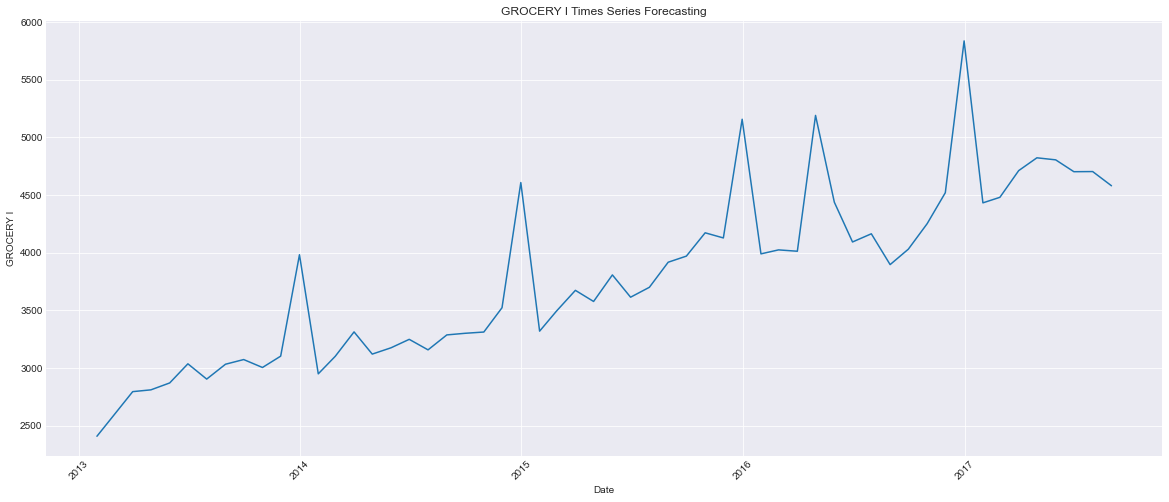

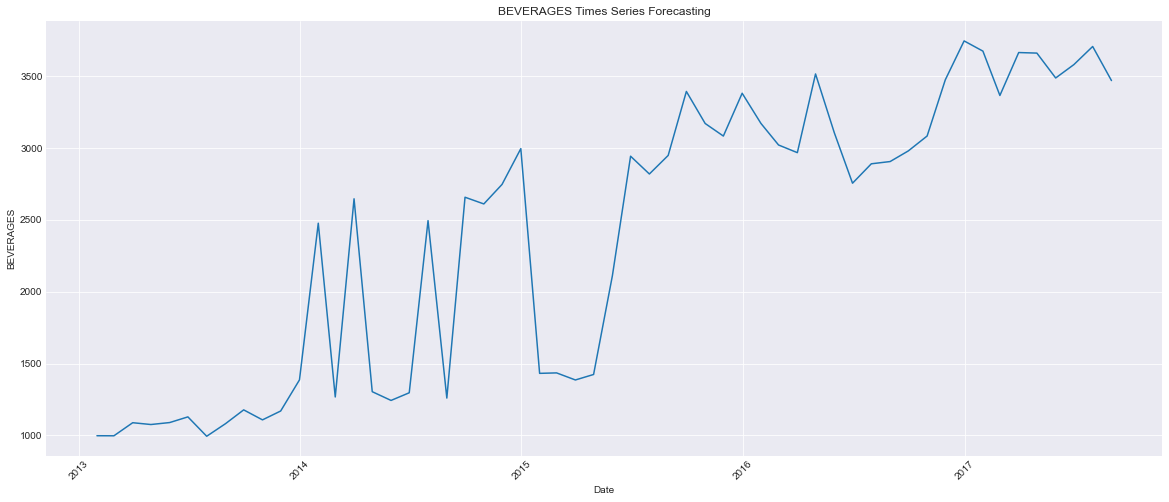

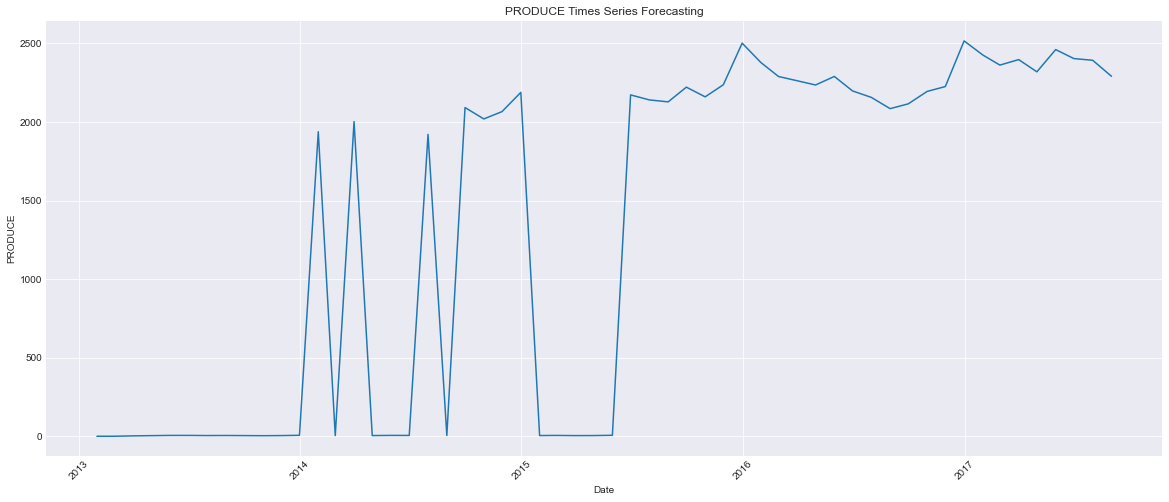

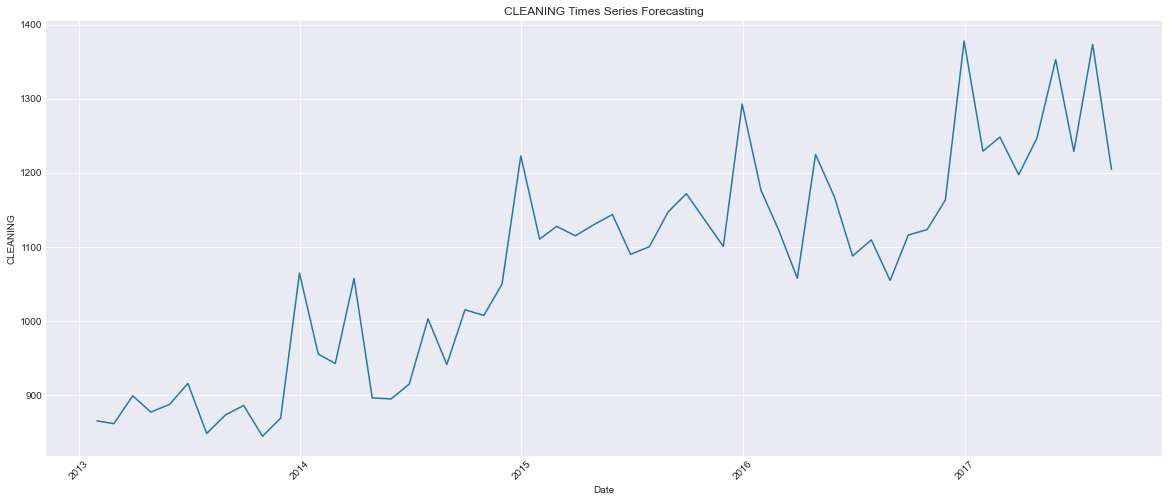

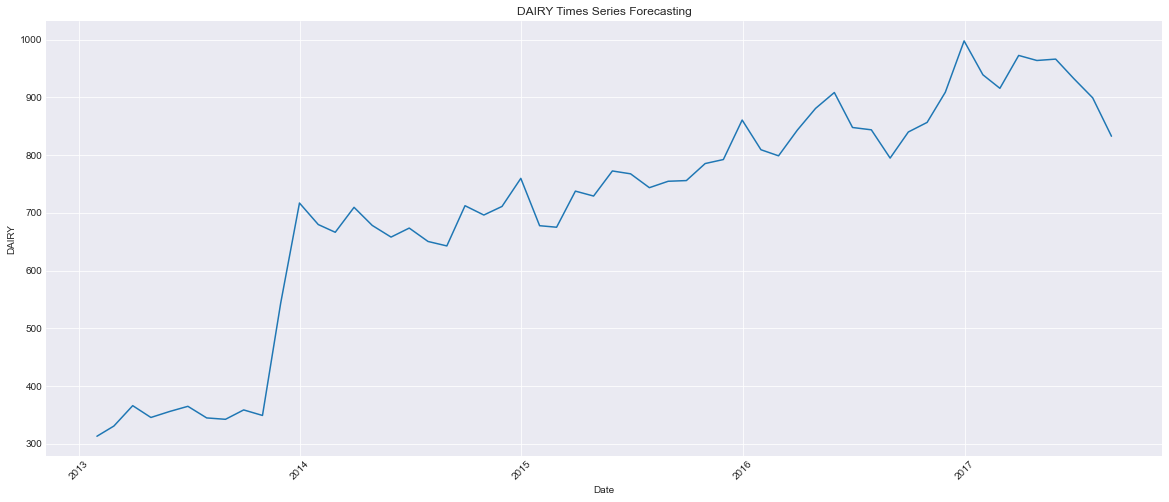

In [ ]:
for i in top_5_categories.family.unique():
    plt.figure(figsize=(20,8))
    sns.lineplot(y = df[['date','sales']][df['family']==i].resample('M', on='date').mean().reset_index(drop=False)['sales']
    , x = df[['date','sales']][df['family']==i].resample('M', on='date').mean().reset_index(drop=False)['date'],linewidth = 1.5)
    plt.xlabel('Date')
    plt.ylabel(i)
    plt.title('{} Times Series Forecasting'.format(i))
    plt.xticks(rotation=45)
    plt.show()

Least 5 categories chart

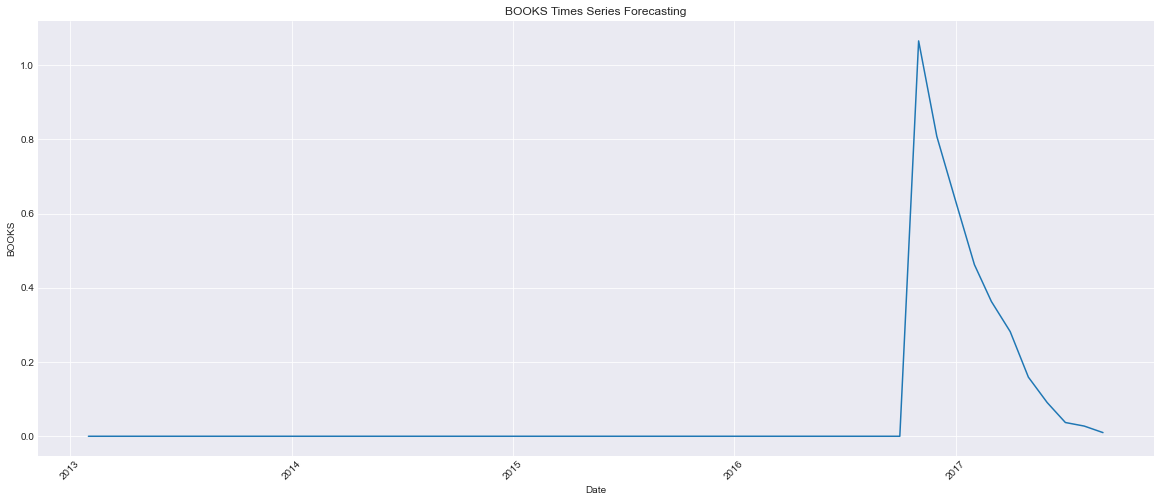

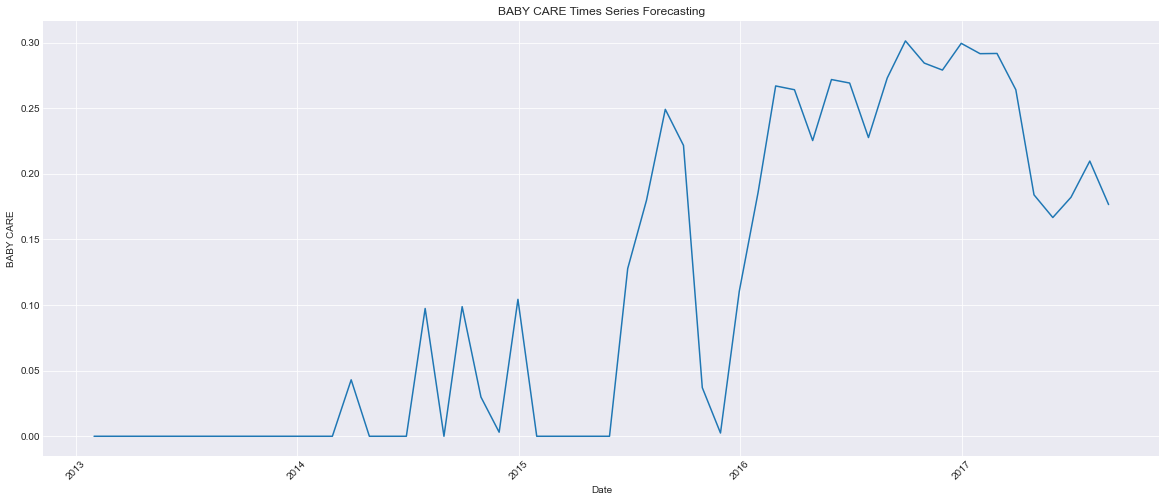

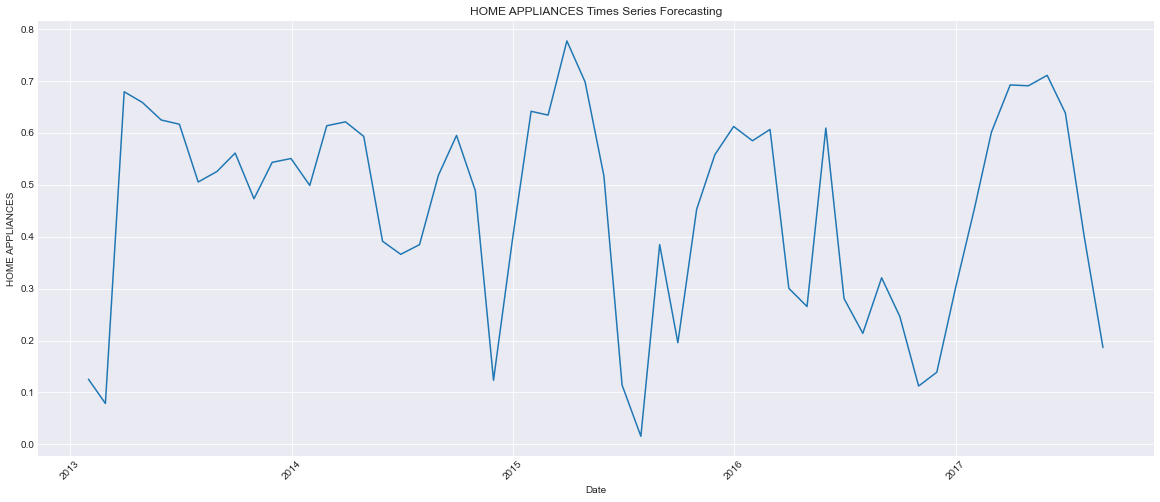

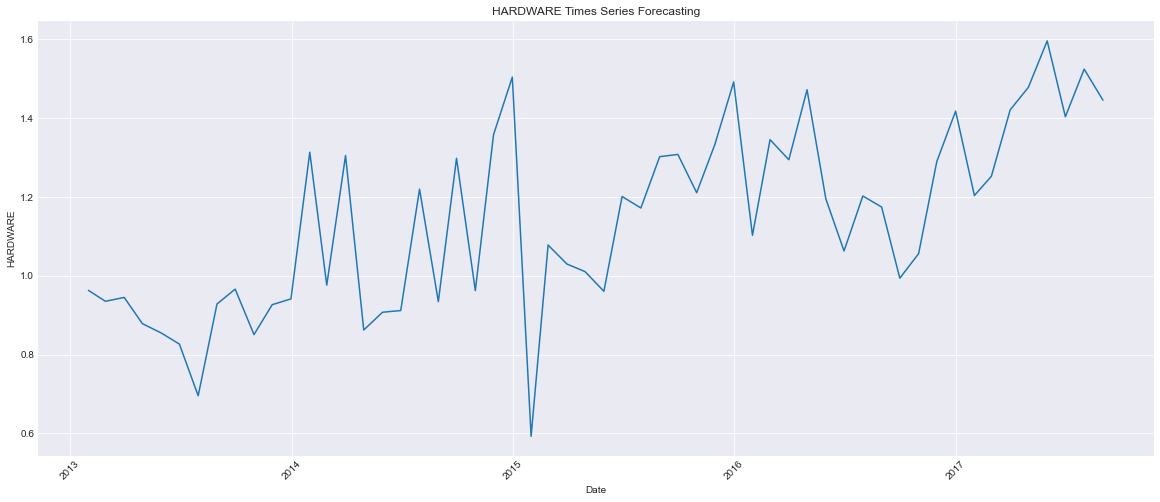

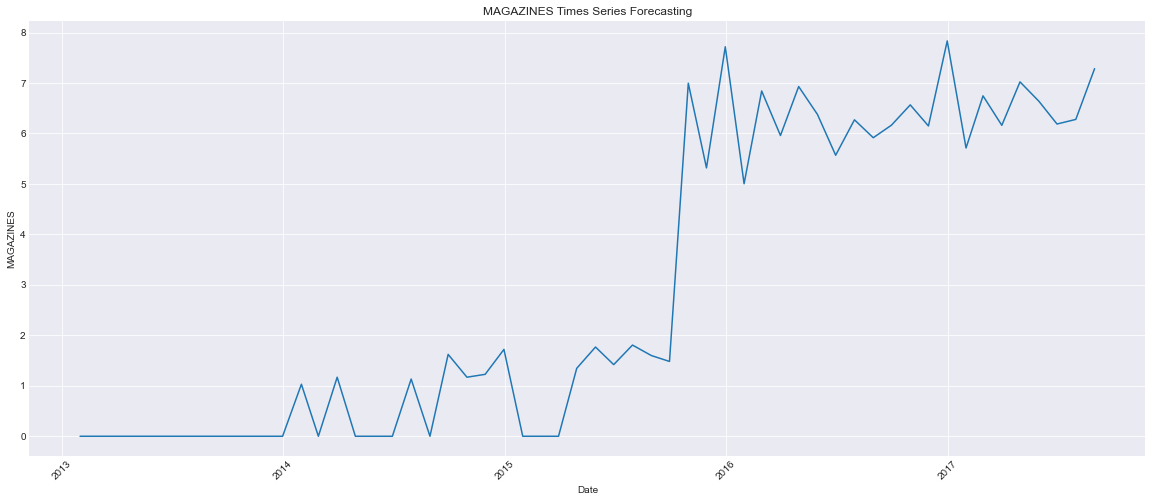

In [ ]:
for i in least_5_categories.family.unique():
    plt.figure(figsize=(20,8))
    sns.lineplot(y = df[['date','sales']][df['family']==i].resample('M', on='date').mean().reset_index(drop=False)['sales']
    , x = df[['date','sales']][df['family']==i].resample('M', on='date').mean().reset_index(drop=False)['date'],linewidth = 1.5)
    plt.xlabel('Date')
    plt.ylabel(i)
    plt.title('{} Times Series Forecasting'.format(i))
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#store = df.set_index(['family']).sort_index()#.resample('M', on='date').mean().reset_index(drop=False)